# Exploratory Data Analysis

In [14]:
#read pickled data
import pandas as pd
import pickle
import numpy as np
#read pickle
df = pd.read_pickle('dt_clean.pkl')
category_id_df = pd.read_pickle('category_id_df.pkl')
with open('id_to_category.pickle', 'rb') as handle:
    id_to_category = pickle.load(handle)
with open('category_to_id.pickle', 'rb') as handle:
    category_to_id = pickle.load(handle)
features = np.load('features.npy')
labels = np.load('labels.npy')
with open('data.pickle', 'rb') as f:
    stop_words = pickle.load(f)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
tfidf0 = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf1 = TfidfVectorizer(analyzer='word', sublinear_tf=True, norm='l2', encoding='latin-1', stop_words=stop_words)
tfidf = TfidfVectorizer(analyzer='word', sublinear_tf=True, norm='l2', encoding='latin-1', ngram_range=(1,2), stop_words=stop_words)
#tfidf3 = TfidfVectorizer(analyzer='char', sublinear_tf=True, norm='l2', encoding='latin-1', ngram_range=(2,3))
tfidf4 = CountVectorizer(stop_words=stop_words)

temp_f = tfidf.fit_transform(df.content).toarray()

Categories

In [16]:
category_id_df

category  category_id
0            Client Training            0
427    Data Population Issue            1
760   Decision Related Issue            2
1522                  Defect            3
1923       Performance Issue            4
2173  Scheduled Report Issue            5
2354    System Not Upto date            6
3697           Webrate Issue            7

Data

In [10]:
df.sample(5)

title                            Subject       id  \
3887              Steven Lerner  User Interface - Date not current  2876014   
2916  Caroline Pravongviengkham                   Data Discrepancy  2927967   
4428                Lisa Browne  User Interface - Date not current  2929602   
1614                 Tim Kenney                   Data Discrepancy  2943134   
3874               Liane Bedard  General - Performance/Speed Issue  2873598   

                   category  \
3887   System Not Upto date   
2916      Further education   
4428   System Not Upto date   
1614  Data Population Issue   
3874   System Not Upto date   

                                            content_old  \
3887  SHAK date is not current and system is locked....   
2916  Dear IDeaS colleague, Ibis City Shoreditch is ...   
4428  Please can you investigate as we have received...   
1614  Please reference case #02940059. Upon re-synci...   
3874  G3 has been updated for 2 days, please advise ...   

                                                content  category_id  
3887  shak date is not current and system is locked ...           12  
2916  dear ideas colleague ibis city shoreditch is m...            8  
4428  please can you investigate as we have received...           12  
1614  please reference case upon resyncing data prio...            5  
3874   has been updated for days please advise statu...           12

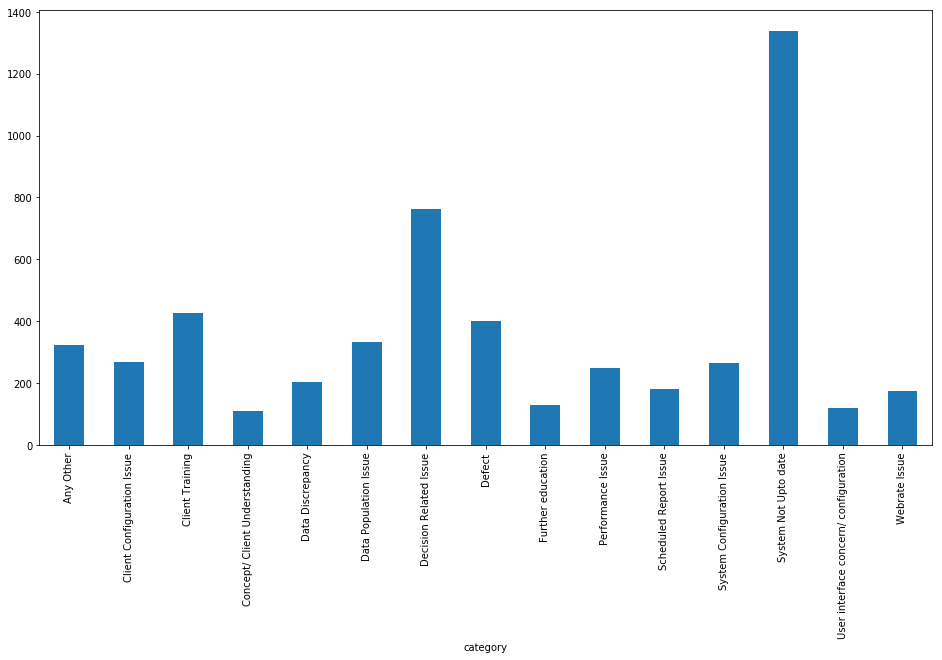

In [11]:
df.groupby('category').id.count().plot.bar(figsize=(16,8))

In [12]:
df_n=df.groupby('category_id', as_index=False)['content'].apply(' '.join)
df_n.reset_index(name='content')
df_m = df_n.to_frame(name='content')

#CountVectorizer: Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(df_m.content)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_m.index
data_dtm = data_dtm.transpose()
data_dtm

0   1   2   3   4   5   6   7   8   9   10  11  12  13  \
aag                    0   0   1   0   0   0   0   0   0   0   0   0   0   0   
aalborg                0   0   0   0   0   0   0   1   0   0   2   0   0   0   
aarhus                 0   0   1   0   0   0   0   1   0   0   2   0   0   0   
aarive                 0   0   0   0   0   0   0   0   0   0   0   0   0   0   
abandoned              0   0   0   0   0   0   0   1   0   0   0   0   0   0   
abbe                   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
abbout                 0   0   1   0   0   0   0   0   0   0   0   0   0   0   
abbreviations          0   0   1   0   0   0   0   0   1   0   0   0   0   0   
abenoistheihotelscom   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
aberdeen               0   1   0   0   0   0   0   0   0   0   0   0   3   0   
abhijit                0   0   0   0   0   0   0   0   0   0   0   0   0   0   
abiab                  0   0   0   0   0   0   0   1   0   0   0   0   0   0   
ability                0   0   2   0   0   0   0   0   1   0   1   0   1   0   
abiola                 0   0   1   0   0   0   2   0   0   0   0   1   1   1   
able                  22  22  30   4   7  10  53  20  15  21  21  23  28  19   
ablte                  0   0   1   0   0   0   0   0   0   0   0   0   0   0   
abnormaly              0   0   0   0   1   0   0   0   0   0   0   0   0   0   
aborted                0   0   0   0   0   0   0   0   0   1   0   0   0   0   
abqem                  0   0   0   0   0   0   0   0   0   0   0   0   0   1   
abqhw                  1   0   0   0   0   0   0   0   0   0   0   0   0   0   
abs                    0   0   0   0   0   1   0   0   0   0   0   0   0   0   
absence                1   0   0   0   0   0   0   0   0   0   0   0   0   0   
absent                 0   0   0   0   0   0   0   0   0   0   0   0   0   0   
absolutely             0   0   0   0   0   0   1   0   0   1   0   0   0   0   
abu                    0   1   0   0   0   0   3   2   0   0   0   0   2   0   
abzdd                  0   0   0   0   0   0   0   1   0   0   0   0   0   0   
ac                     0   0   0   0   0   0   0   0   0   0   0   0   0   0   
academy                0   0   0   0   0   0   0   0   0   2   0   0   0   0   
acc                    0   0   1   0   0   0   0   0   0   0   0   0   0   0   
accept                 1   0   0   0   0   0   1   1   0   1   1   1   0   1   
...                   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
yvrvm                  1   0   0   0   0   0   0   0   0   0   0   0   0   0   
ywgww                  0   2   0   0   0   0   0   0   0   0   0   0   0   0   
yyzhw                  1   0   0   0   0   0   0   0   0   0   0   0   0   0   
yyzmk                  1   0   0   0   0   0   0   0   0   0   0   0   0   0   
zaehler                0   0   0   0   0   0   0   0   0   1   0   0   0   0   
zahid                  0   0   0   0   0   0   0   0   0   0   0   0   1   0   
zane                   0   0   0   0   0   0   2   0   0   0   0   0   0   0   
zelos                  0   0   0   0   0   0   0   0   0   0   1   0   0   0   
zeppelin               0   0   0   0   0   0   0   0   0   1   0   0   0   0   
zero                   3   7   4   0   5   7   6   8   0   0   0   5   0   1   
zeros                  0   0   0   0   1   0   0   0   0   0   0   0   0   0   
zeytinburnu            0   0   0   0   0   0   0   0   0   0   0   0   0   0   
zhu                    0   0   1   0   0   0   0   0   0   0   0   0   0   0   
zigure                 0   0   0   0   0   0   2   0   0   0   0   0   0   0   
zip                    1   0   0   0   0   0   0   0   0   0   0   0   0   0   
zirpola                0   0   0   0   0   0   0   0   0   0   0   0   0   1   
zone                   0   0   0   0   0   0   0   3   0   0   5   2   2   0   
zones                  0   0   0   0   0   0   0   0   0   0   0   0   1   0   
zoom                  

ValueError: num must be 1 <= num <= 12, not 13

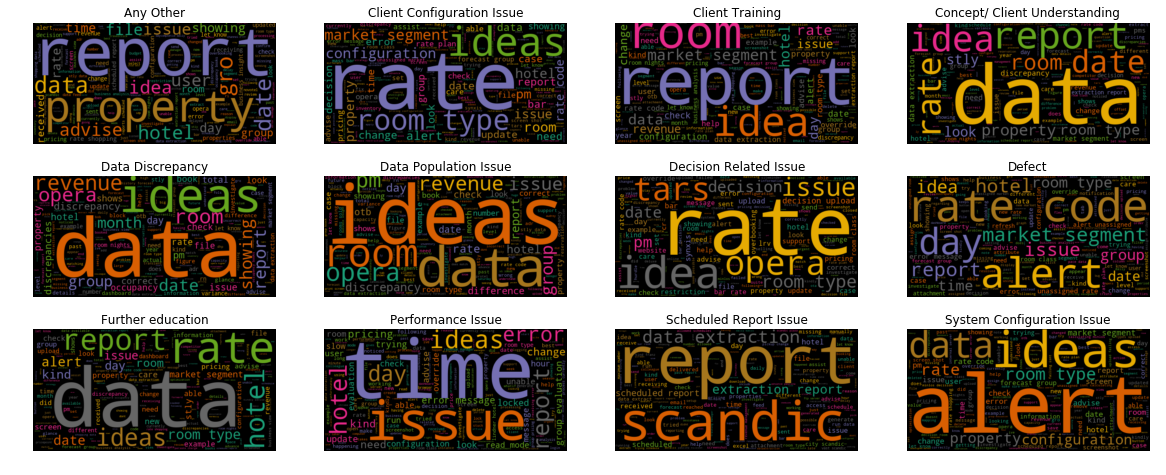

In [13]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="black", width=600, height=300, colormap="Dark2",
               max_font_size=200)
#wc = WordCloud(stopwords=stop_words, width=600, height=300,max_font_size=200)
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 8]

full_names = category_id_df['category'].values.tolist()

# Create subplots for each c
for index, comedian in enumerate(data_dtm.columns):
    wc.generate(df_m.content[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

used chi2 to see most common key words

In [154]:
from sklearn.feature_selection import chi2
N=10
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]


  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

# 'Data Discrepancy':
  . Most correlated unigrams:
       . report
       . otb
       . bob
       . transient
       . rooms
       . total
       . forecast
       . books
       . revenue
       . stly
  . Most correlated bigrams:
       . shows rooms
       . occupancy books
       . forecast report
       . revenue books
       . room revenue
       . transient group
       . business view
       . history forecast
       . market segment
       . room nights
  . Most correlated trigrams:
       . 
# 'Decision Related Issue':
  . Most correlated unigrams:
       . crs
       . failed
       . decisions
       . upload
       . synxis
       . tars
       . decision
       . bar
       . rates
       . rate
  . Most correlated bigrams:
       . rate code
       . bar decisions
       . bar decision
       . read mode
       . bar rates
       . upload tars
       . room type
       . room types
       . upload failed
       . decision upload
  . Most correlated trigrams:
       .

In [155]:
unigrams

['derya',
 'continuously',
 'fix',
 'tina',
 'solutions',
 'nearly',
 'gregoire',
 'consider',
 'nihan',
 'sorted',
 'rosewood',
 'concern',
 'gone',
 'immediately',
 'incident',
 'reprocess',
 'know',
 'emailing',
 'recieved',
 'waiting',
 'latest',
 'general',
 'twice',
 'configurations',
 'carolina',
 'machado',
 'impossible',
 'crucial',
 'resume',
 'normally',
 'adjustments',
 'suggested',
 'sms',
 'youve',
 'linda',
 'takes',
 'shoreditch',
 'log',
 'dom',
 'carmen',
 'acknowledgement',
 'soon',
 'possible',
 'adjust',
 'marie',
 'given',
 'detailed',
 'agnes',
 'sep',
 'mean',
 'competitors',
 'sven',
 'paul',
 'phder',
 'busiest',
 'transferring',
 'shopping',
 'implement',
 'suggest',
 'took',
 'jenny',
 'saving',
 'dears',
 'displays',
 'reaching',
 'carlyle',
 'smith',
 'leeds',
 'aymeric',
 'awaiting',
 'taking',
 'hermitage',
 'recommend',
 'jacelyn',
 'switched',
 'abiola',
 'ensure',
 'media',
 'immediate',
 'succesfully',
 'shared',
 'sandrine',
 'repeated',
 'frustrati

In [156]:
from sklearn.feature_selection import chi2
N=5
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  #trigrams = [v for v in feature_names if len(v.split(' ')) == 3]


  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  #print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

# 'Data Discrepancy':
  . Most correlated unigrams:
       . total
       . forecast
       . books
       . revenue
       . stly
  . Most correlated bigrams:
       . transient group
       . business view
       . history forecast
       . market segment
       . room nights
# 'Decision Related Issue':
  . Most correlated unigrams:
       . tars
       . decision
       . bar
       . rates
       . rate
  . Most correlated bigrams:
       . upload tars
       . room type
       . room types
       . upload failed
       . decision upload
# 'Performance Issue':
  . Most correlated unigrams:
       . slow
       . error
       . trying
       . group
       . evaluation
  . Most correlated bigrams:
       . error message
       . currently running
       . process currently
       . group evaluations
       . group evaluation
# 'System Not Upto date':
  . Most correlated unigrams:
       . rates
       . bar
       . room
       . rate
       . updated
  . Most correlated bigrams:
  

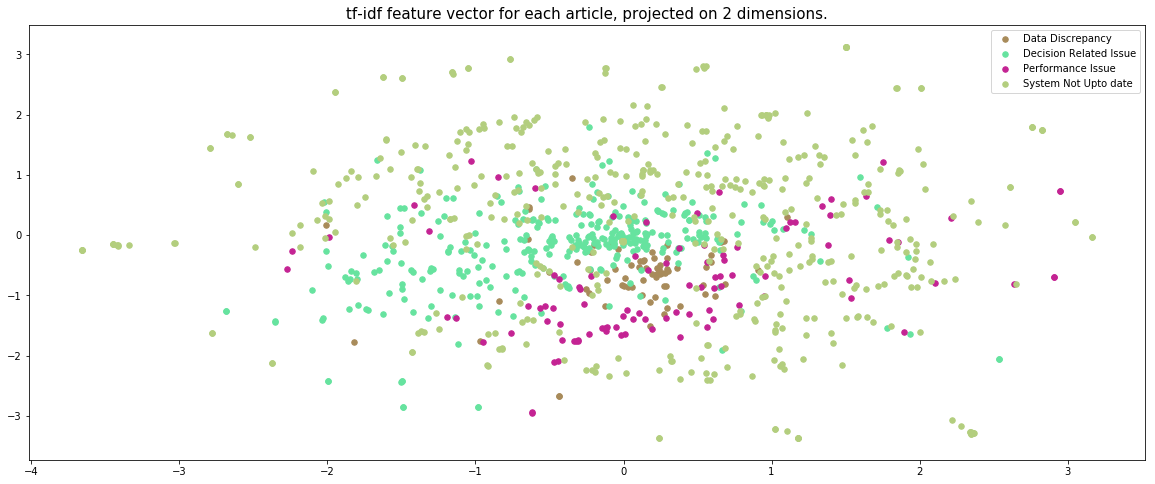

In [157]:
import matplotlib.pyplot as plt
import random
r = lambda: random.randint(0,255)

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.4)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2).fit_transform(features[indices])
#projected_features = TruncatedSVD(n_components=2).fit_transform(features[indices])

colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in category_to_id.items()]
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id)]#.values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()